# Machine Learning

Information that helped me with machine learning. (Not a comprehensive tutorial.)

## Step 1. Developing in Python

### VS Code

* Text editor, not an IDE.

* Marketplace of extensions that provide language-specific behavior.

### Python

* Interpreted language for data scientists. Slow but very flexible. Perfect for torturing actual software developers.

* "Virtual environments" instead of projects, using `pip` to manage packages.

### Jupyter

* Code + markdown = executable documentation.

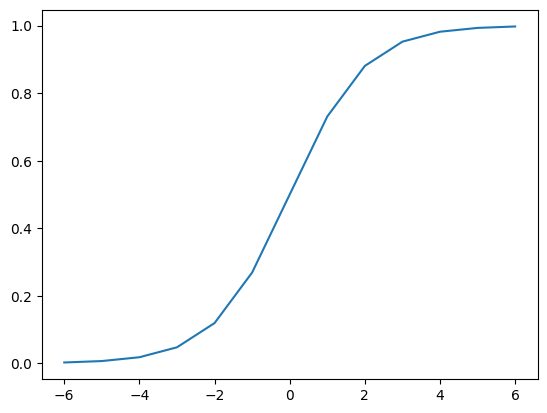

In [3]:
import math
import matplotlib.pyplot as plt

x = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
y = [1/(1+math.exp(-z)) for z in x]   # sigmoid function

plt.plot(x, y)
plt.show()

![](https://www.gstatic.com/education/formulas2/553212783/en/sigmoid_function.svg)

## Step 2. PyTorch

* Open source machine learning framework from Meta.

* Becoming more popular than Google's Tensorflow.

* Can run on either CPU (slow) or GPU (fast, called "CUDA").

In [4]:
import torch

print(torch.__version__)

2.0.1+cpu


## Step 3. Tensors

**A tensor is an N-dimensional array.**

<img src="https://miro.medium.com/1*6Z892ClZGon03_Mawj4Pew.png" width="400"/>

### 0-dimensional tensor

Also known as a scalar. Here we create a tensor from a single numeric value:

In [5]:
ndim0 = torch.tensor(3.1415)
print(ndim0)

tensor(3.1415)


### 1-dimensional tensor

Also known as a vector. We can create a tensor from a Python list:

In [6]:
ndim1 = torch.tensor([1, 2, 4, 8, 16, 32])
print(ndim1)

tensor([ 1,  2,  4,  8, 16, 32])


(Note: A vector can also be considered as a position in N-dimensional space. Both interpretations are valid, but don't get them mixed up.)

### 2-dimensional tensor

Also known as a matrix, which is essentially a table of rows and columns. Here, we generate a 1D tensor of 12 integers, and then change its shape:

In [7]:
ndim1 = torch.arange(0, 12)
ndim2 = ndim1.view(3, 4)   # 3 rows by 4 columns
print(ndim2)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Note that ranges in Python are [inclusive, exclusive).

We can modify the data in the tensor:

In [8]:
ndim2[1,0] = -100
print(ndim2)

tensor([[   0,    1,    2,    3],
        [-100,    5,    6,    7],
        [   8,    9,   10,   11]])


Note that the view shares its data with the original tensor:

In [9]:
print(ndim1)

tensor([   0,    1,    2,    3, -100,    5,    6,    7,    8,    9,   10,   11])


We can also transpose a tensor's rows and columns:

In [10]:
print(ndim2.transpose(0, 1))   # transpose dim-0 and dim-1

tensor([[   0, -100,    8],
        [   1,    5,    9],
        [   2,    6,   10],
        [   3,    7,   11]])


### 3-dimensional tensor

In [11]:
ndim3 = torch.rand(2, 3, 4)   # 2 layers X 3 rows X 4 columns
print(ndim3)

tensor([[[7.8692e-01, 7.3494e-01, 5.4965e-01, 1.5367e-01],
         [8.2164e-01, 2.7644e-01, 8.9855e-01, 6.5875e-01],
         [2.5583e-01, 4.0269e-01, 4.2412e-01, 7.8743e-01]],

        [[6.4250e-01, 1.3230e-01, 6.4417e-01, 8.4505e-01],
         [8.6251e-01, 6.0479e-01, 8.4146e-01, 1.2609e-02],
         [7.2491e-04, 7.4945e-01, 5.1800e-01, 7.9297e-01]]])


### Higher dimensions

It gets harder to visualize tensors as the number of dimensions increases:

In [12]:
ndim4 = torch.rand(2, 3, 2, 3)   # 2 hyperlayers X 3 layers X 2 rows X 3 columns
print(ndim4)

tensor([[[[0.6440, 0.0293, 0.9643],
          [0.1653, 0.1378, 0.7640]],

         [[0.5278, 0.8728, 0.0746],
          [0.0811, 0.4497, 0.0576]],

         [[0.5593, 0.2474, 0.4735],
          [0.5462, 0.3849, 0.0383]]],


        [[[0.2258, 0.9004, 0.1014],
          [0.4740, 0.1922, 0.3041]],

         [[0.1354, 0.6847, 0.4215],
          [0.5321, 0.1354, 0.4780]],

         [[0.8394, 0.8399, 0.4042],
          [0.9957, 0.1405, 0.5260]]]])


### Changing dimensionality

Start with a 1D vector:

In [13]:
vector = torch.arange(-4, 5)   # 1D: 9 columns
print(vector)
print(vector.shape)

tensor([-4, -3, -2, -1,  0,  1,  2,  3,  4])
torch.Size([9])


If we insert a dimension of size 1 in front, the columns stay columns:

In [14]:
unsq0 = vector.unsqueeze(0)   # 2D: 1 row x 9 columns
print(unsq0)
print(unsq0.shape)

tensor([[-4, -3, -2, -1,  0,  1,  2,  3,  4]])
torch.Size([1, 9])


If we insert a dimension of size 1 at the end, the columns become rows:

In [15]:
unsq1 = vector.unsqueeze(1)   # 2D: 9 rows x 1 column
print(unsq1)
print(unsq1.shape)

tensor([[-4],
        [-3],
        [-2],
        [-1],
        [ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]])
torch.Size([9, 1])


## Step 4. Neural network building blocks

Some examples from the "nn" zoo:

In [16]:
import torch.nn as nn

* In general, these are functions of type `Tensor -> Tensor`, so a complex neural network can be built by composition.

* During training, the model learns the best values for the parameters inside these blocks.

### Linear layer

Applies a linear transformation: y = xW<sup>T</sup> + B

Where:
* x is the input tensor
* y is the output tensor
* W is a 2D tensor of weight parameters
* B is a 1D tensor of bias parameters
* xW<sup>T</sup> is matrix multiplication of x by the transpose of W.

In [17]:
linear = nn.Linear(in_features=20, out_features=30)
print("Weight:", linear.weight.shape)
print("Bias:", linear.bias.shape)
print("Total # of parms:", sum(parm.numel() for parm in linear.parameters()))   # (30 x 20) + 30

Weight: torch.Size([30, 20])
Bias: torch.Size([30])
Total # of parms: 630


Linear transforms are useful for "projecting" a tensor into a different shape with the same number of dimensions:

In [18]:
x = torch.rand(5, 6, 20)   # last dimension must match linear input
print("Input:", x.shape)
y = linear(x)              # result is still 3D, but now with 30 columns
print("Output:", y.shape)

Input: torch.Size([5, 6, 20])
Output: torch.Size([5, 6, 30])


### Dropout layer

Randomly sets some of the input to zero during training (and the remaining elements are scaled up proportionally). Dropout prevents the model from becoming too reliant on a small set of parameters.

A dropout layer has no parameters, but its dropout rate (e.g. 20%) is a hyperparameter.

In [19]:
dropout = nn.Dropout(0.2)

x = torch.ones(3, 4)
print(x)
y = dropout(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.2500, 1.2500, 1.2500, 0.0000],
        [0.0000, 1.2500, 1.2500, 0.0000],
        [1.2500, 1.2500, 1.2500, 1.2500]])


The dropout is recomputed during each application, so results are not deterministic:

In [20]:
y = dropout(x)
print(y)

tensor([[0.0000, 0.0000, 1.2500, 1.2500],
        [1.2500, 1.2500, 0.0000, 0.0000],
        [0.0000, 1.2500, 1.2500, 1.2500]])


### Layer normalization

Normalizes input around its mean and standard deviation. This reduces training time by reigning in large values.

In [21]:
numColumns = 4
norm = nn.LayerNorm(numColumns)   # expect last dimension of this size

x = torch.arange(0.0, 12.0).view(-1, numColumns)   # -1: PyTorch infers the # of rows
print(x)
y = norm(x)
print(y)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416]],
       grad_fn=<NativeLayerNormBackward0>)


The normalization can have weight and bias parameters that the model learns during training:

In [22]:
print("Weight:", norm.weight)
print("Bias:", norm.bias)

Weight: Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)
Bias: Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)


### Embedding

asdf

### Activation

asdf

## Step 5. Building a model

### Non-linear regression

Let's say we have simple non-linear function that we want a neural network to learn. (This is like using a bomb to kill an ant, but it illustrates the basic principle well.)

In [23]:
def targetFunc(x):
    return 3 * x ** 2 + 10

We need some training data, consisting of input and output tensors from the function:

In [24]:
domain = 6.0
xBatch = torch.arange(-domain, domain+1).unsqueeze(1)
print("Input:\n", xBatch)

yTarget = targetFunc(xBatch)
print("Output:\n", yTarget)

Input:
 tensor([[-6.],
        [-5.],
        [-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.]])
Output:
 tensor([[118.],
        [ 85.],
        [ 58.],
        [ 37.],
        [ 22.],
        [ 13.],
        [ 10.],
        [ 13.],
        [ 22.],
        [ 37.],
        [ 58.],
        [ 85.],
        [118.]])


The target function is a parabola:

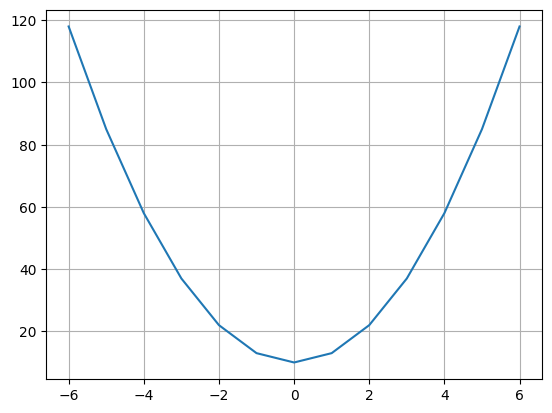

In [25]:
plt.plot(xBatch, yTarget)
plt.grid()
plt.show()

Now define the model, which consists of a non-linear layer sandwiched between two linear layers. Since the target function is scalar -> scalar, the model must have a single input value and a single output value.

In [42]:
model = nn.Sequential(
    nn.Linear(1, 10, bias = True),
    nn.ReLU(),
    nn.Linear(10, 1, bias = True))

The model's parameters are initialized with random values by default.

In [43]:
for (name, parm) in model.named_parameters():
    print("\n{}: {}".format(name, parm.data.shape))
    print("   ", parm.data)

numParms = sum(parm.numel() for parm in model.parameters())
print("\nTotal # of parameters:", numParms)


0.weight: torch.Size([10, 1])
    tensor([[-0.9273],
        [-0.8943],
        [-0.0507],
        [ 0.7354],
        [ 0.8515],
        [-0.4421],
        [-0.5236],
        [-0.5502],
        [-0.5688],
        [-0.1901]])

0.bias: torch.Size([10])
    tensor([ 0.9702,  0.2688,  0.0109,  0.5185, -0.5492, -0.2329, -0.0730, -0.5917,
         0.5463,  0.3091])

2.weight: torch.Size([1, 10])
    tensor([[ 0.1432,  0.2517,  0.0777,  0.0451,  0.0791,  0.0463, -0.1257, -0.3053,
          0.2541, -0.0411]])

2.bias: torch.Size([1])
    tensor([-0.0008])

Total # of parameters: 31


To train the model, we need:
* A loss function that determines how far off target the model is, and
* An optimizer that will attempt to minimize the loss. The optimizer's "learning rate" determines how much of an adjustment it will make to the model's parameters on each iteration.

In [44]:
lossFunc = nn.MSELoss()   # mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)   # stochastic gradient descent

Now, we're ready to train the model. During each iteration:

1. Make a forward pass to generate a batch of predicted values.
2. Calculate the difference between the predicted and target values. This is called the "loss".
3. Make a backward pass from the loss through the model to calculate gradients, which are the directions in which each parameter much be adjusted.
4. Adjust each parameter by a small amount accordingly. We don't want to overshoot the best value.

Epoch 0, loss 3974.566162109375


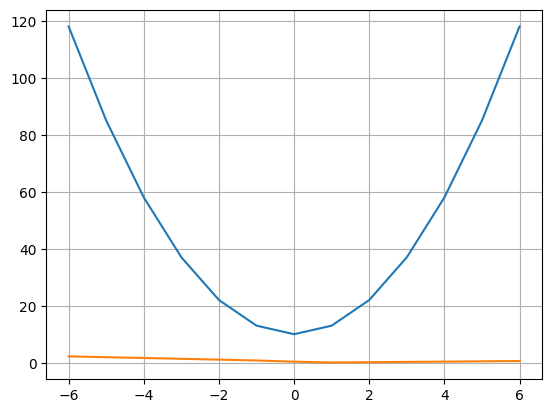

Epoch 1, loss 3701.561279296875


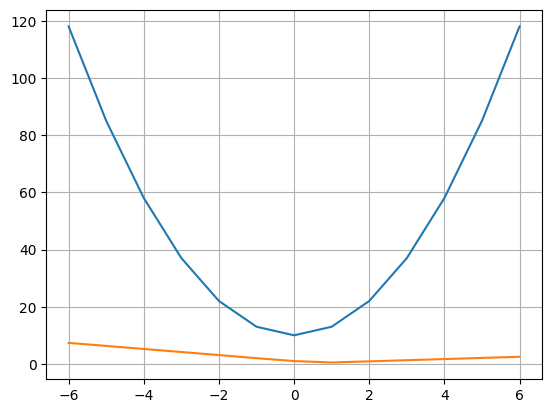

Epoch 2, loss 3405.30859375


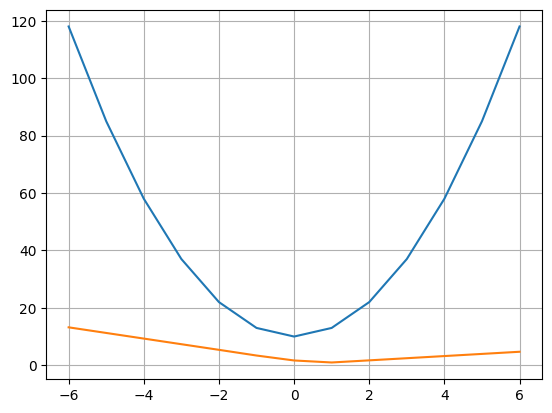

Epoch 4, loss 2634.47998046875


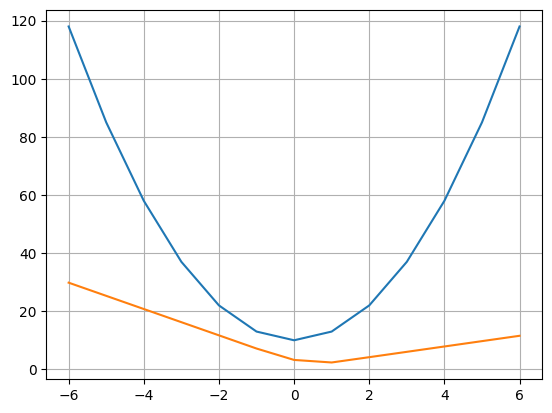

Epoch 8, loss 814.5615234375


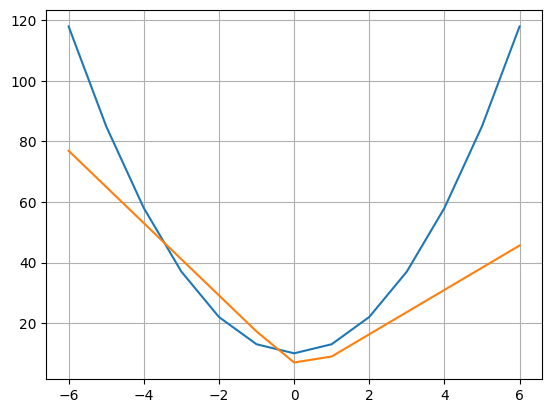

Epoch 16, loss 141.5579376220703


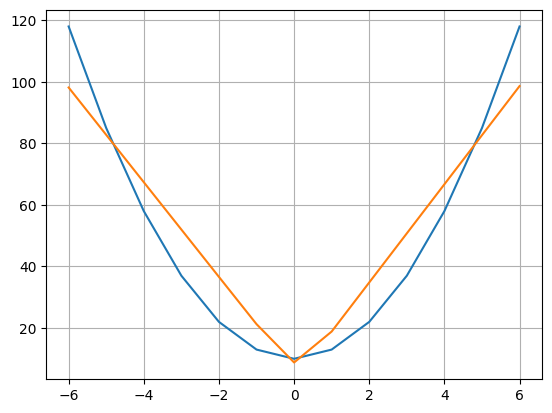

Epoch 32, loss 133.76927185058594


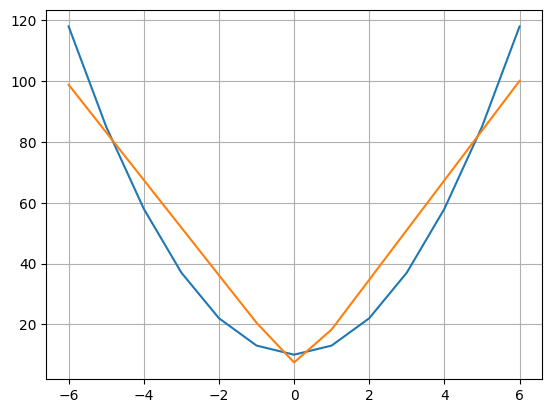

Epoch 64, loss 121.84476470947266


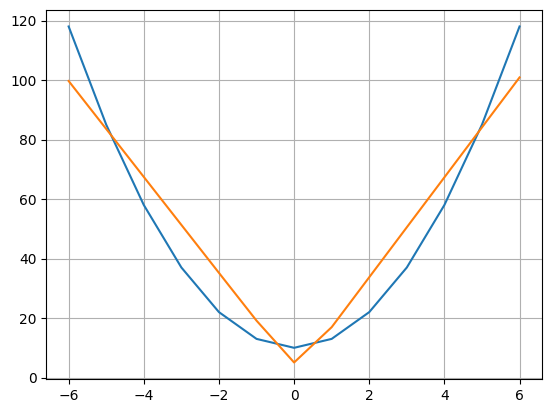

Epoch 128, loss 104.65026092529297


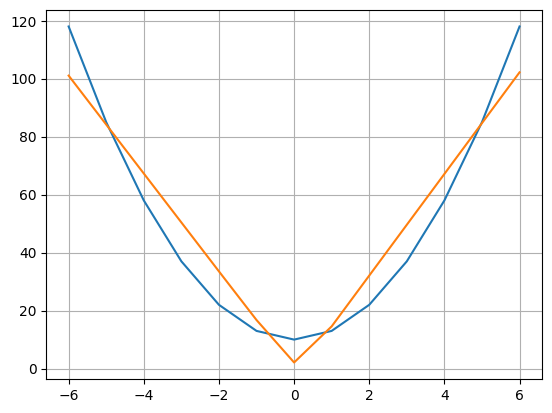

Epoch 256, loss 80.19151306152344


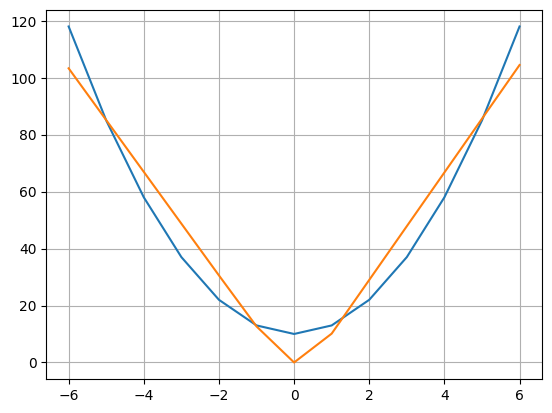

Epoch 512, loss 56.65595245361328


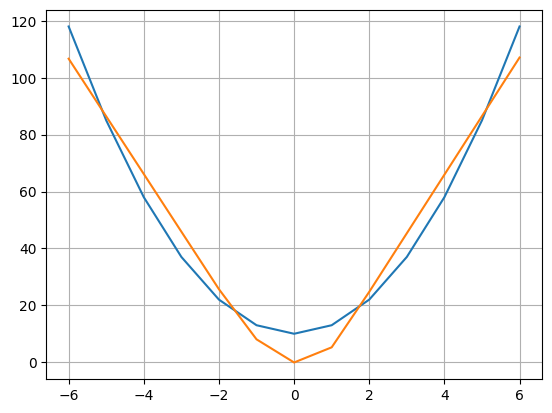

Epoch 1024, loss 18.502071380615234


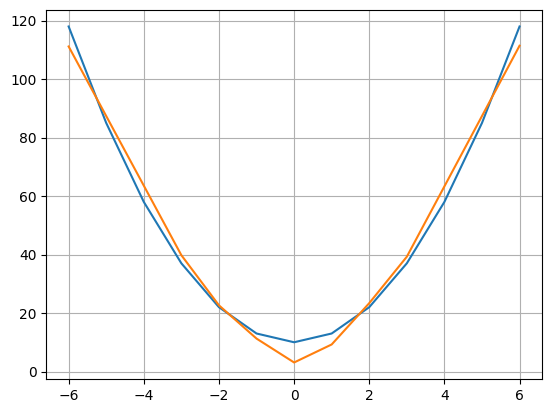

Epoch 2048, loss 3.4952738285064697


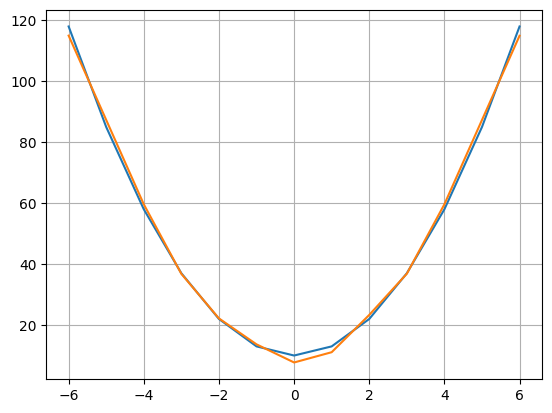

Epoch 4096, loss 1.0519784688949585


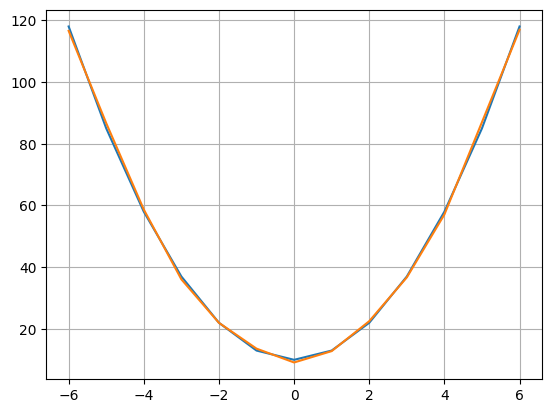

Epoch 8192, loss 0.7491917014122009


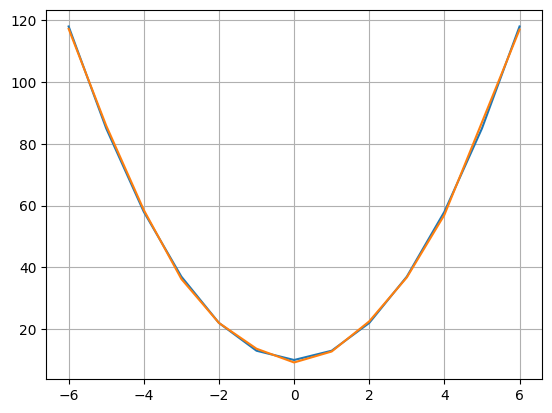

Epoch 16384, loss 0.5855048894882202


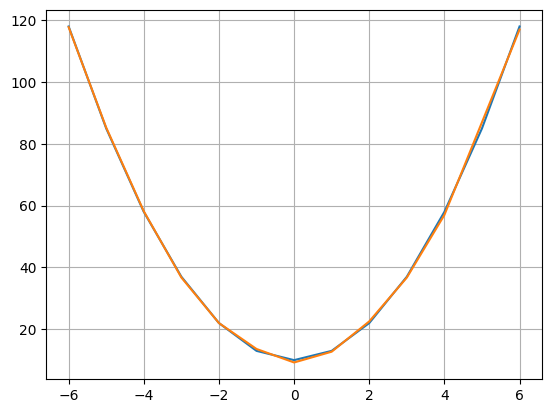

Epoch 32768, loss 0.5608350038528442


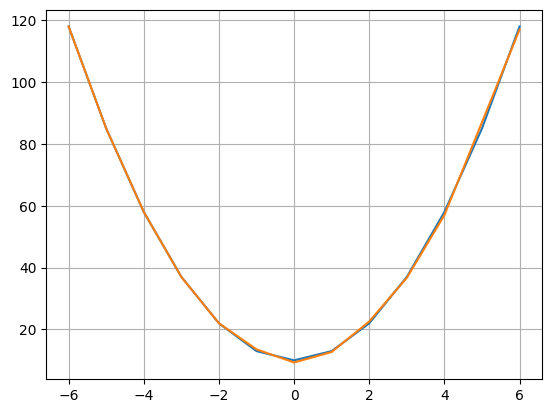

Epoch 65536, loss 0.5530068874359131


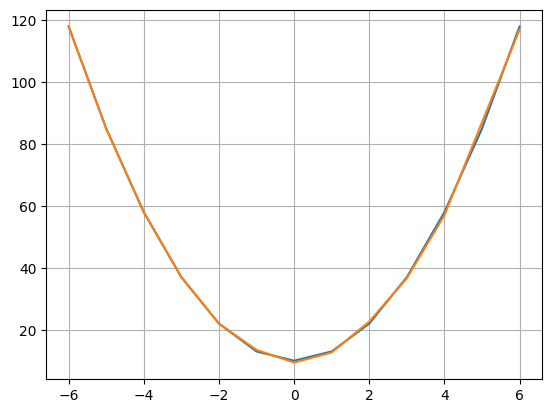

In [45]:
for epoch in range(100000):

    # forward pass
    yPrediction = model(xBatch)

    # calculate loss
    loss = lossFunc(yPrediction, yTarget)
    if (epoch & (epoch-1) == 0):   # check for power of 2
        print("Epoch {}, loss {}".format(epoch, loss))
        with torch.no_grad():
            plt.plot(xBatch, yTarget)
            plt.plot(xBatch, yPrediction)
        plt.grid()
        plt.show()

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # adjust parameters
    optimizer.step()

The model has learned parameter values that approximate the target function well.

In [30]:
for (name, parm) in model.named_parameters() :
    print("{}: {}".format(name, parm.data))

0.weight: tensor([[ 0.6600],
        [ 1.0852],
        [ 0.9631],
        [ 1.6152],
        [ 1.5383],
        [-2.0668],
        [ 1.5328],
        [ 1.5151],
        [-3.6050],
        [ 0.6587]])
0.bias: tensor([-0.6601,  2.1704,  1.9266, -1.6155, -6.9127, -7.4644, -3.4532, -4.2200,
        -1.6629, -1.5084])
2.weight: tensor([[0.9298, 2.1812, 1.9658, 2.1350, 6.9878, 7.6782, 3.6656, 4.3655, 3.9194,
         1.6267]])
2.bias: tensor([0.8390])
